In [1]:
import pandas as pd

In [3]:
dp=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv")
dp.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
leaved=dp[dp.left==1]
leaved.shape

(3571, 10)

In [6]:
stayed=dp[dp.left==0]
stayed.shape

(11428, 10)

In [8]:
#people stayed more than leaved-Conclusion
dp.groupby('left').mean()

C:\Users\Dev Atul Patel\AppData\Local\Temp\ipykernel_10828\937584285.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dp.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
import seaborn as sns

<AxesSubplot: xlabel='salary', ylabel='count'>

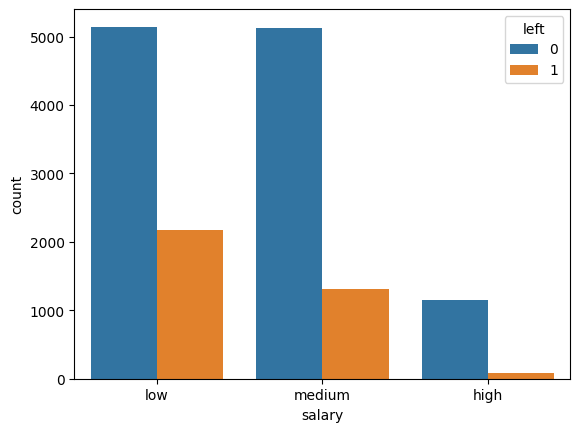

In [10]:
sns.countplot(x='salary',hue='left',data=dp)

<AxesSubplot: xlabel='Department', ylabel='count'>

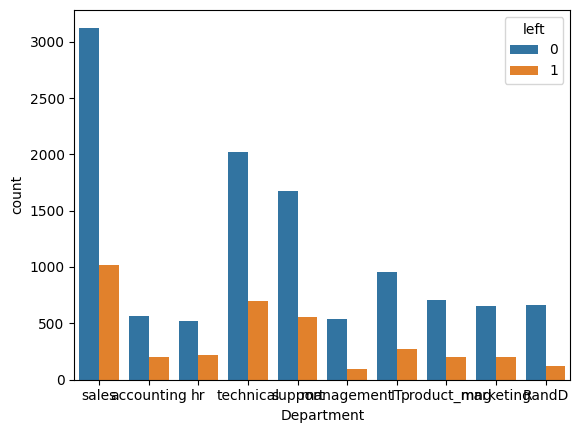

In [11]:
sns.countplot(x='Department',hue='left',data=dp)

In [15]:
imp=dp[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
imp

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [17]:
sal=pd.get_dummies(dp['salary'],drop_first=True)
sal.head()

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [20]:
new=pd.concat([imp,sal],axis=1)
new

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,low,medium
0,0.38,157,0,low,1,0
1,0.80,262,0,medium,0,1
2,0.11,272,0,medium,0,1
3,0.72,223,0,low,1,0
4,0.37,159,0,low,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,low,1,0
14995,0.37,160,0,low,1,0
14996,0.37,143,0,low,1,0
14997,0.11,280,0,low,1,0


In [23]:
new.drop(['salary'],axis=1,inplace=True)
new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [24]:
X=new
new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [26]:
y=dp.left

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
pred=model.predict(X_test)
pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
model.score(X_test,y_test)

0.7773333333333333

In [34]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,pred)

array([[7509,  460],
       [1878,  653]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,pred)

0.7773333333333333